<a href="https://colab.research.google.com/github/ylnrahma/PCVK_ganjil2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Praktikum Pertemuan 10 - Tresholding**

Nama: Yuliyana Rahmawati

NIM: 2141720241

Kelas: 3B-TI

### **PRAKTIKUM**



1.    import folder yang ada di Drive Anda dengan cara sebagai berikut.


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive



2.   Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.



In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.



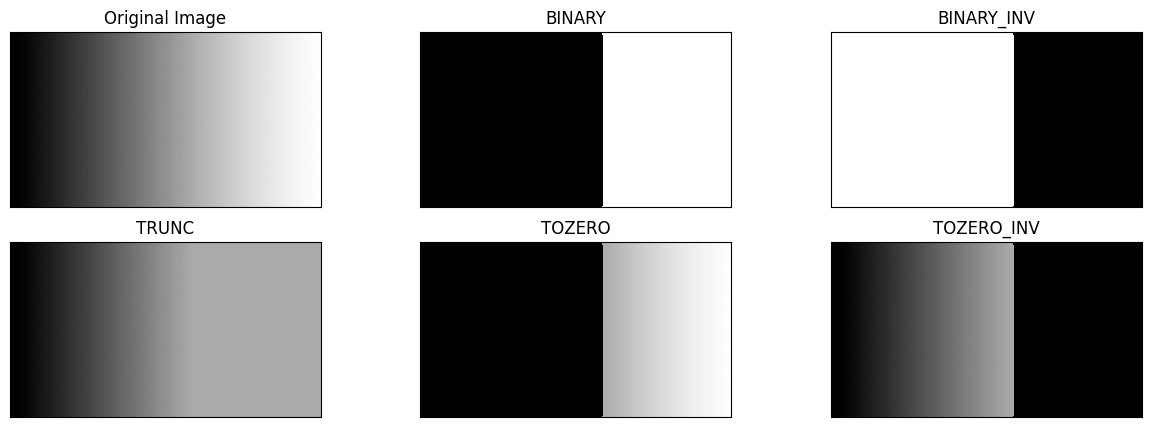

In [ ]:
filename_1 = ('/content/drive/MyDrive/PCVK/images/gradient.jpg')
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 170    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1

#3. Threshold Truncate
thresh3[img_g>thresh] = thresh

#4. Threshold Tozero
thresh4[img_g<=thresh] = 0

#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)



<ipython-input-27-ff66454b18ba>:24: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


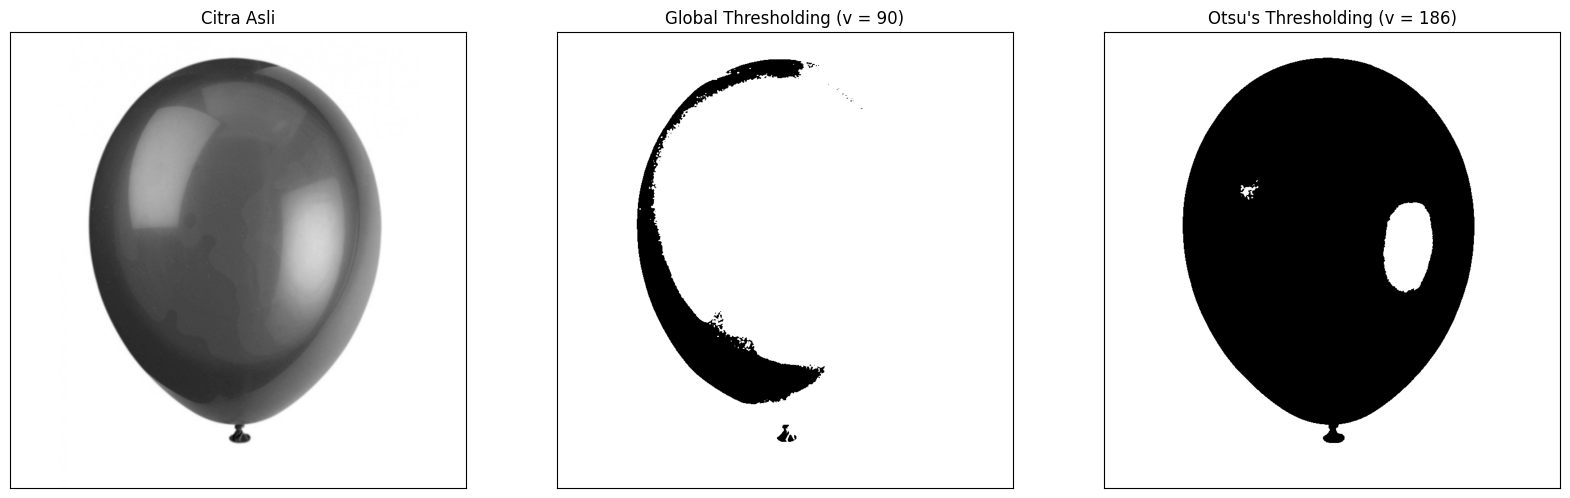

In [ ]:
# tanpa menggunakan library
filename_2 = ('/content/drive/MyDrive/PCVK/images/balloon.jpg')
img_lgs = cv2.imread(filename_2, 0)
blur = cv2.GaussianBlur(img_lgs,(5,5),0)
thresh = 90

img_lgs = cv2.imread(filename_2, 0)
blur = cv2.GaussianBlur(img_lgs, (5,5),0)
hist = cv2.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0,187):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

  *   anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  *   Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html
  *   Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).









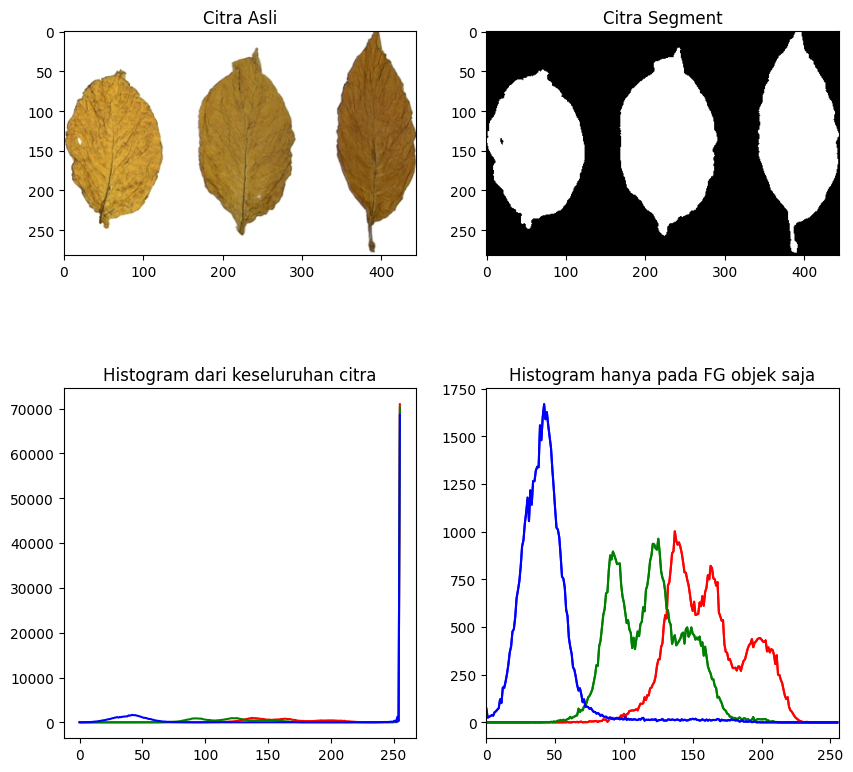

In [ ]:
filename_3 = ('/content/drive/MyDrive/PCVK/images/tobacco.jpg')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)




(<Axes: >, <matplotlib.image.AxesImage at 0x7943688f1090>)

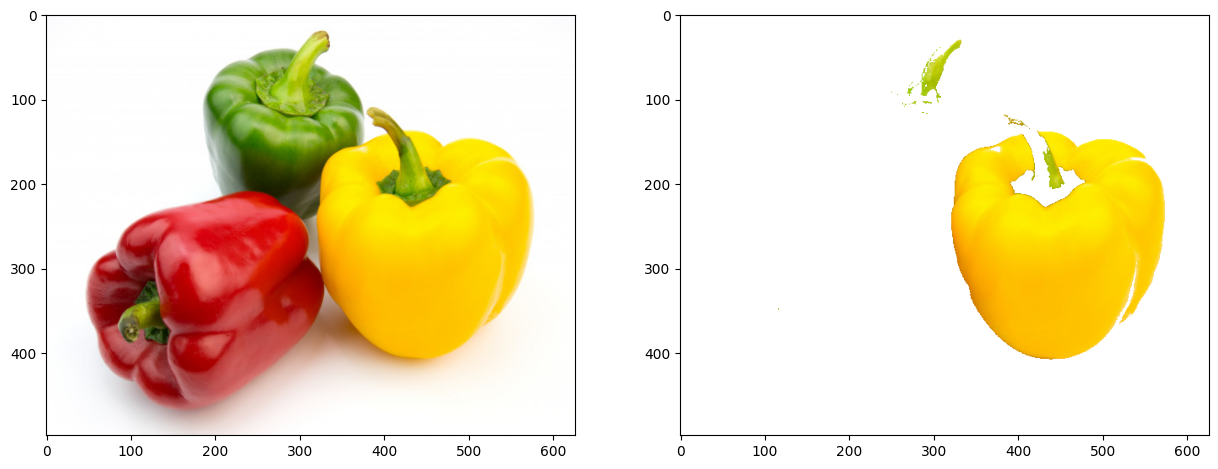

In [3]:
dir = ('/content/drive/MyDrive/PCVK/images/peppers.jpg')
img = cv2.imread(dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = np.copy(img)
segmented_image0= segmented_image.reshape((-1, 3))
segmented_image0[labels != 1] = [255, 255, 255]
segmented_image0 = segmented_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image0)

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.



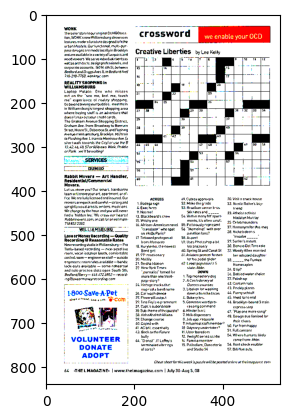

In [ ]:
img_c = cv2.imread('/content/drive/MyDrive/PCVK/images/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 145, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()